<a href="https://colab.research.google.com/github/omkarwazulkar/ComputerVisionProjects/blob/main/B%26W_Cloth_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


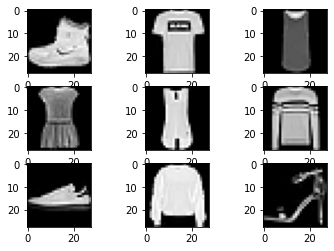

In [1]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# **Creating and Evaluating Baseline Model**

In [34]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [35]:
# Loading Train and Test Dataset

def load_dataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [36]:
# Scaling Pixels

def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [37]:
# Define CNN Model

def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # Compiling Model
  opt = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [38]:
# Evaluating Model using k-fold Cross Validation

def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [43]:
# Plotting Diagnostic Curves

def summarize_diagnostics(histories):
  for i in range(len(histories)):

    # Plotting Loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')

    # Plotting Accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
  pyplot.show()

In [40]:
# Summarizing Performance

def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100,
  len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

In [44]:
# Creating Test Harness Function to combine all above Metrics

def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  scores, histories = evaluate_model(trainX, trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)

> 90.550
> 90.475
> 90.767
> 91.067
> 90.950


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


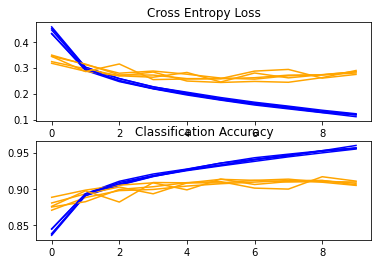

Accuracy: mean=90.762 std=0.226, n=5


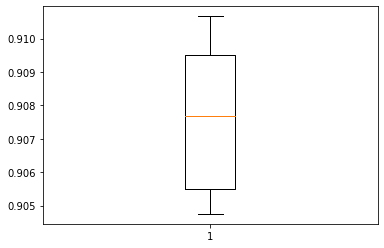

In [45]:
# Running Test Harness to Evaluate Model

run_test_harness()

# **Building A More Improved Model**

In [46]:
# Define CNN Model with Padding

def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # Compiling Model
  opt = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

> 90.975
> 90.517
> 91.675
> 91.558
> 91.308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


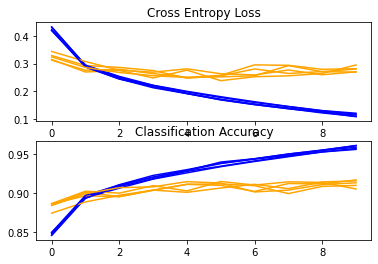

Accuracy: mean=91.207 std=0.420, n=5


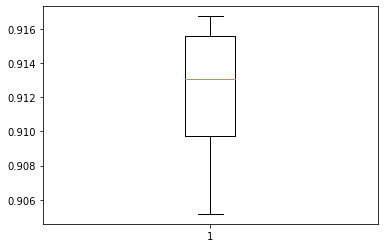

In [47]:
run_test_harness()

# **Improving Model with more Filters, Changing Filter to 64**

In [48]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # Compiling Model
  opt = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

> 90.883
> 90.992
> 91.100
> 90.567
> 91.175


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


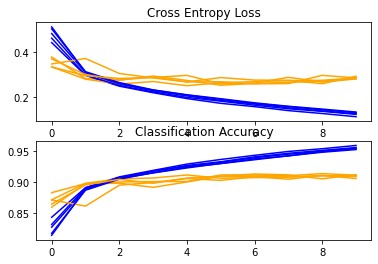

Accuracy: mean=90.943 std=0.213, n=5


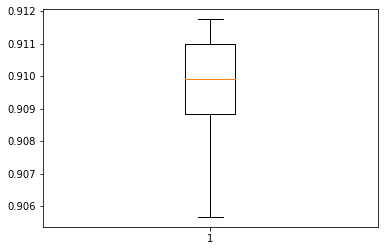

In [49]:
run_test_harness()

# **Saving the Model**

In [52]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [51]:
# Loading Train and Test Data
def load_dataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [50]:
# Scaling Pixels
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [56]:
# Defining CNN Model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # Compiling Model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [57]:
def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = define_model()
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
  model.save('final_model.h5')

run_test_harness()

# **Evaluating the Model**

In [58]:
from keras.models import load_model

def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = load_model('final_model.h5')
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))

In [59]:
run_test_harness()

> 91.250


# **Predicting on New Image**

In [60]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [61]:
# Loading Image
def load_image(filename):
  img = load_img(filename, grayscale=True, target_size=(28, 28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  return img

In [70]:
# Predicting Class
def run_example():
  img = load_image('/content/sample_image.png')
  model = load_model('final_model.h5')
  result = model.predict(img)
  print(result[0])

In [71]:
# Running on New Image
run_example()

[2.0912241e-06 2.8675437e-10 9.9997687e-01 1.1759290e-06 1.1092928e-05
 4.8495847e-12 8.6638011e-06 3.8571288e-09 4.6735105e-10 3.0666472e-10]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [72]:
# [2] Denotes Pullover